
Expectation: A working solution where the learned class label using Logistic Regression is similar (for most possible points) to the training class label. 

Optional: Show the decision boundary. Note that it is not trivial to the draw the decision boundary in the examples below. 



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.randint(0, 1)*2 - 1
%matplotlib inline

In [20]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def get_loss(yhat, y):
  return np.sum(-y*np.log(yhat) - (1-y)*np.log(1-yhat), axis = 0)

In [7]:
def plotClass(X,y,p):
    #plt.figure()
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)
            
    #plt.show()

(2, 1000)
(1, 1000)


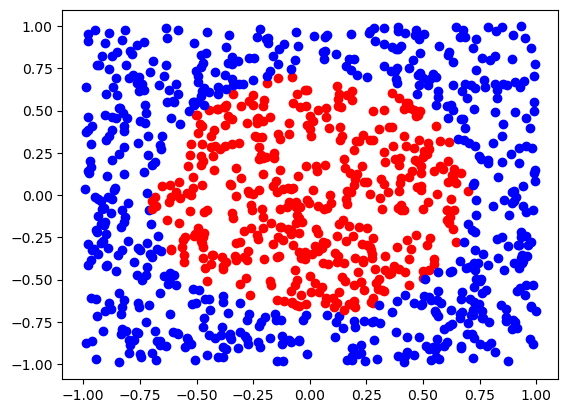

In [8]:
num_data=1000 # data points per class

X=np.random.uniform(-1,1,[2,num_data])
y=X[0,:]**2+X[1,:]**2-0.5>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

In [9]:
M = 1
Xbig = []
Xbig.append(X[1,:]**0) # this is to have the first column as ones for the bias
Xbig.append(X[1,:]**2) # X1**2
Xbig.append(X[0,:]**2) #X2**2

Xbig = np.array(Xbig).squeeze().T
# Xbig = Xbig[:,:-1]
print(Xbig.shape)
Xbig=Xbig.T

(1000, 3)


C:\Users\reemH\AppData\Local\Temp\ipykernel_18384\2504973904.py:20: RuntimeWarning: invalid value encountered in sqrt
  x2 = np.sqrt((-w[1]*x1**2-w[0]) / w[2]) # solve x2 by ectracting it from the circle equation
C:\Users\reemH\AppData\Local\Temp\ipykernel_18384\2504973904.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


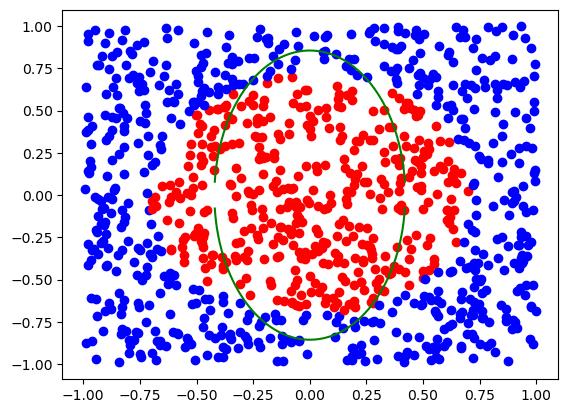

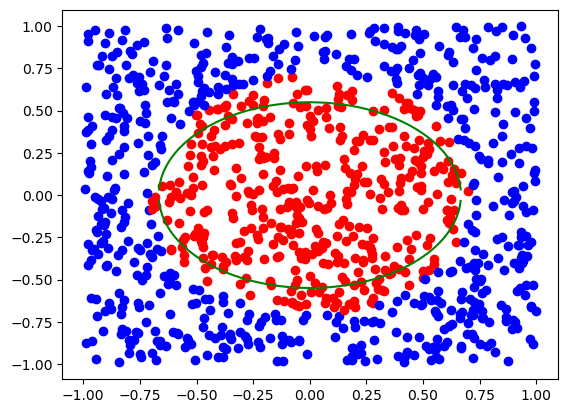

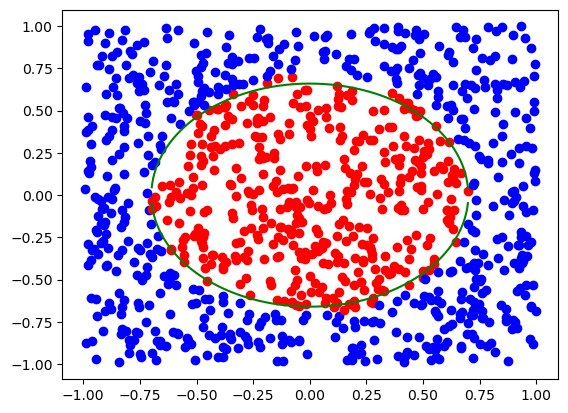

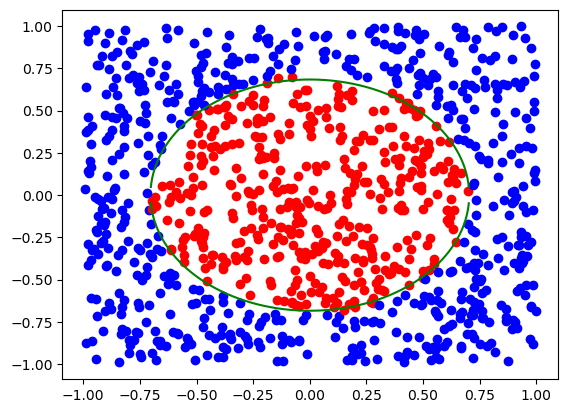

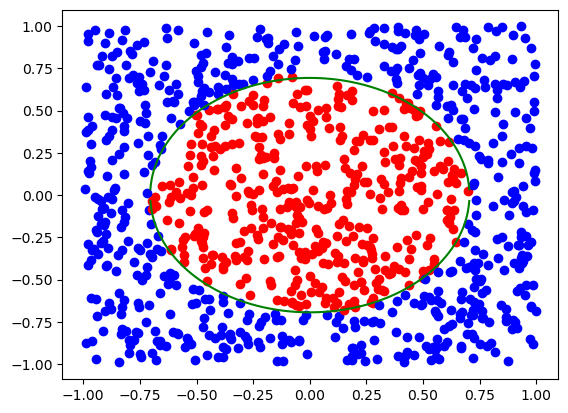

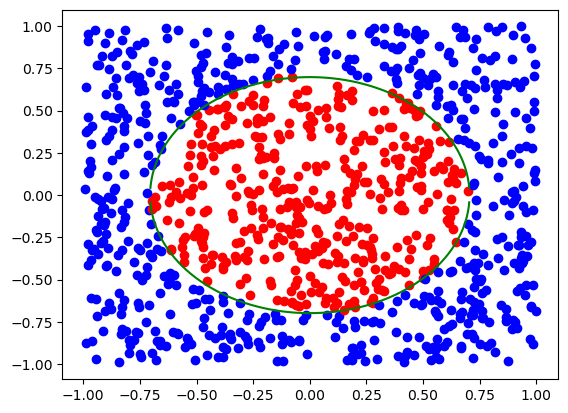

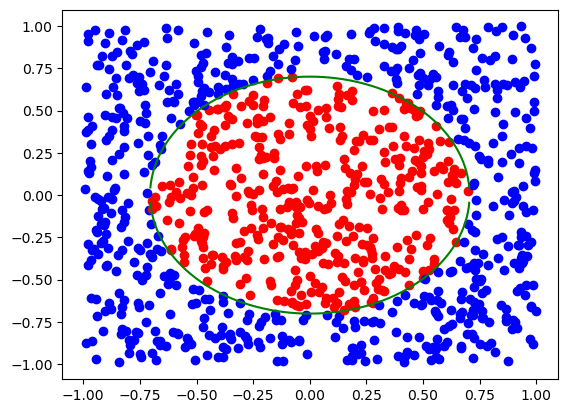

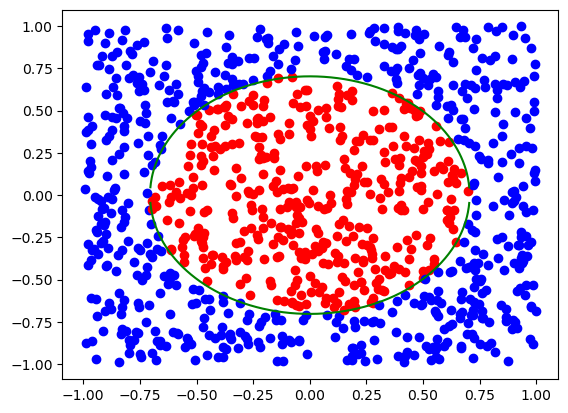

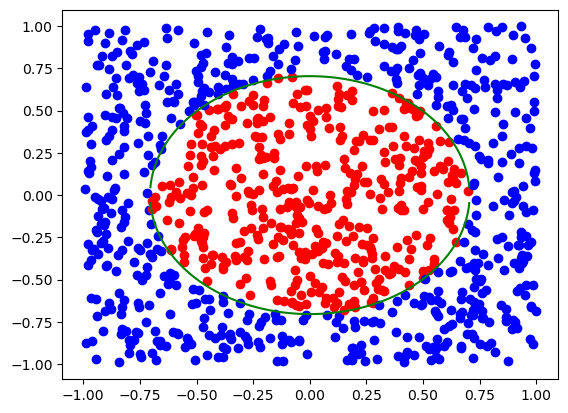

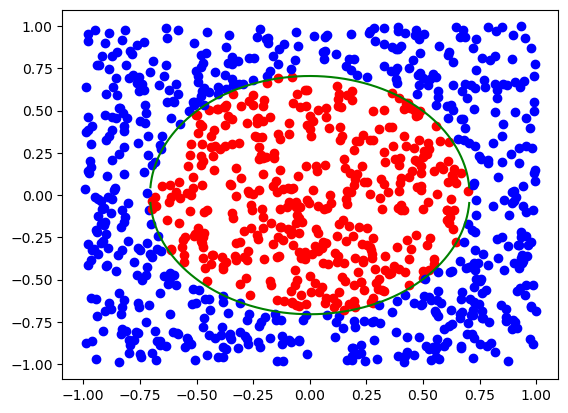

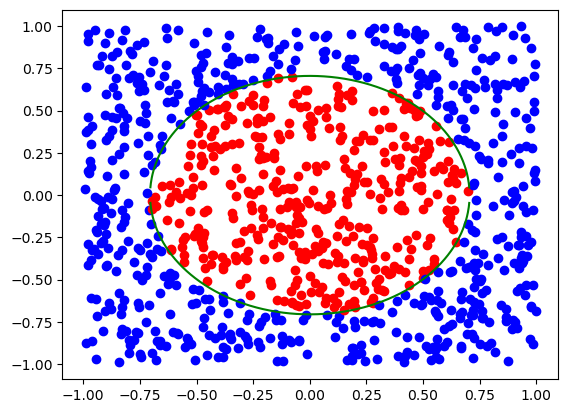

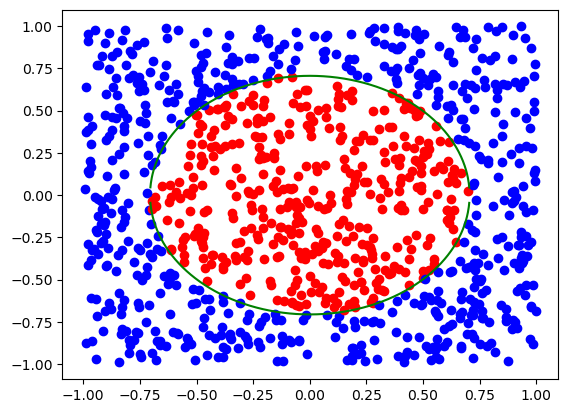

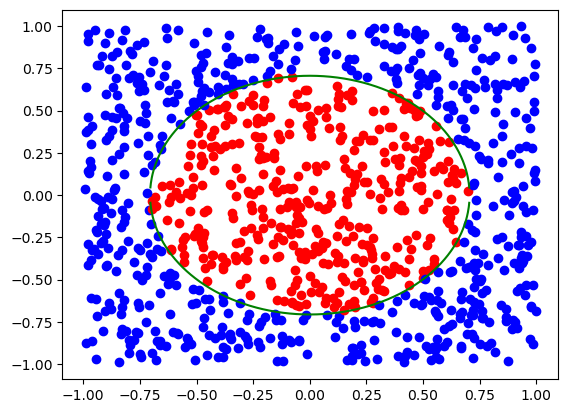

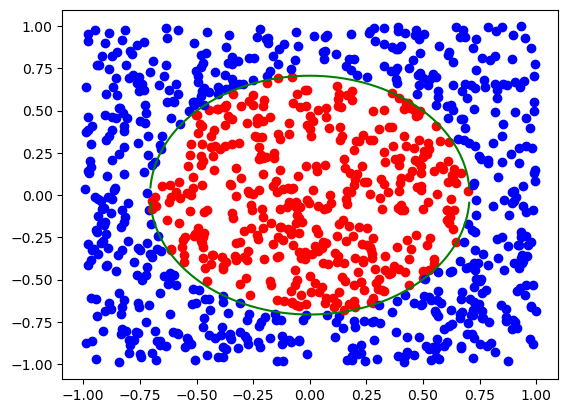

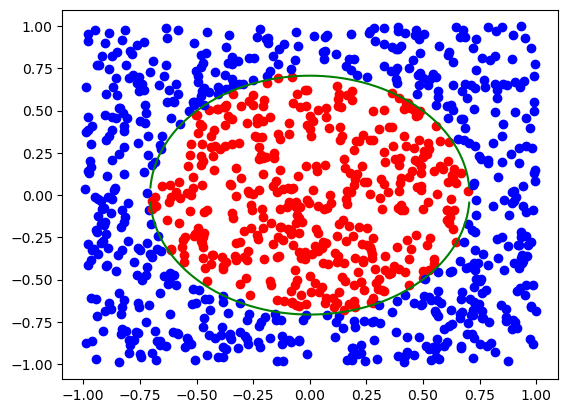

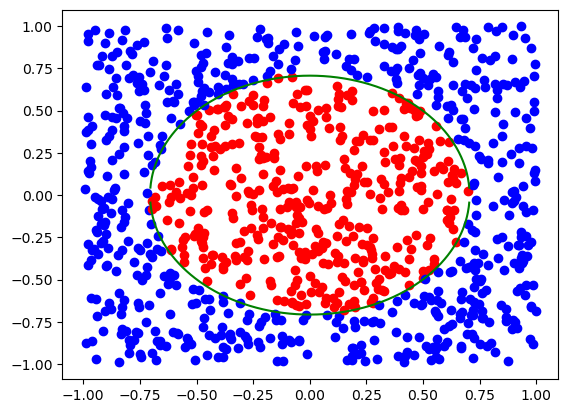

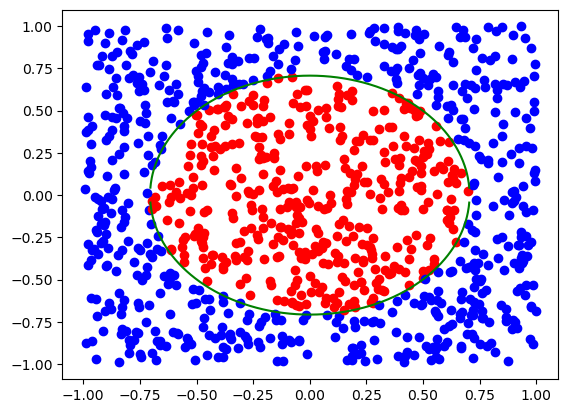

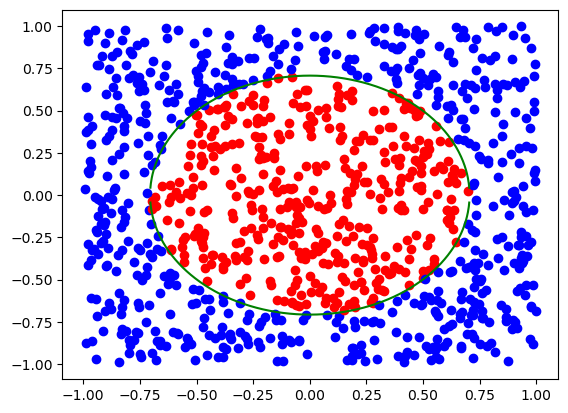

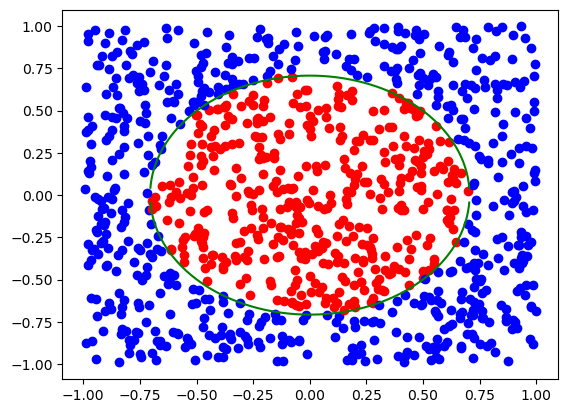

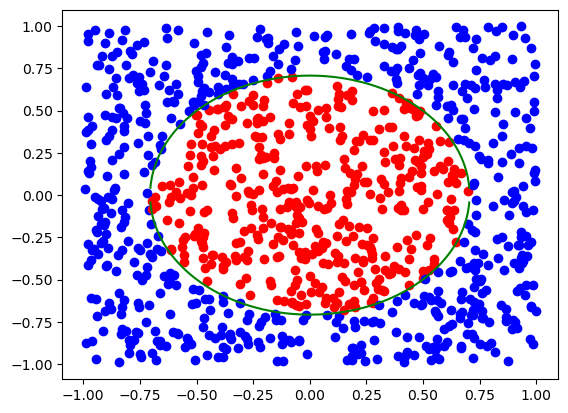

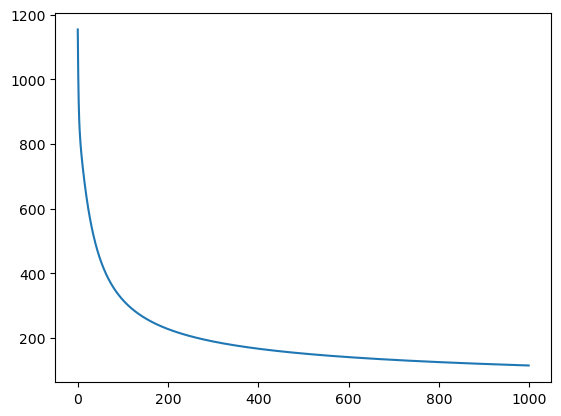

In [10]:
lr = 1e-3
w = np.random.randn(3,1)
ls = []
for i in range(1000):
  #forward pass
  z = Xbig.T@w
  yhat = sigmoid(z)
  l = loss(yhat, y.T)
  ls.append(l)

  # backward pass
  #dL/dw = dw
  dw = Xbig @ (yhat- y.T)
  w = w - lr*dw
  #plotting
  if i% 50 ==0:
    plt.figure()
    plotClass(X,y,'o')
    x1 = np.linspace(-1,1, 1000) # just generate points for x1 
    x2 = np.sqrt((-w[0]*x1**2-w[1]) / w[2]) # solve x2 by ectracting it from the circle equation
    """
    w0 + w1*x1 + w2*x2 =0
    x2 = (-w0 - w1*x1)/w2
    """
    plt.plot(x1,x2, 'g')
    plt.plot(x1,-x2, 'g')

plt.figure()
plt.plot(ls)

In [135]:
# Now let's try with nn (Day 4)
import torch
from torch import nn, optim

accuracy:  62.40000128746033 %


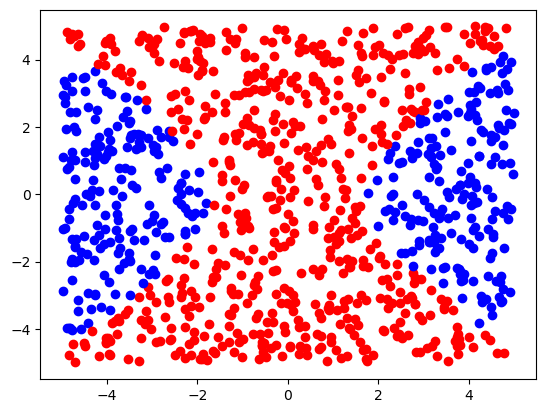

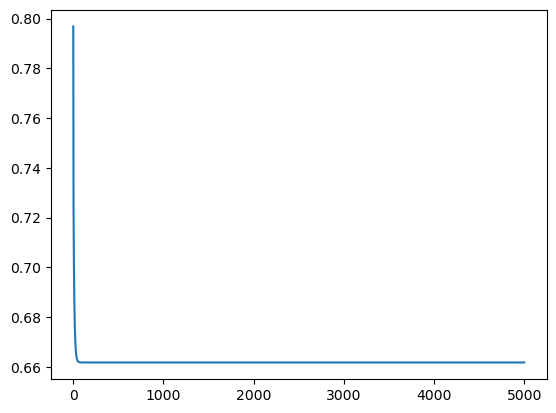

In [137]:
#Q2
num_data=1000 # data points per class
X=np.random.uniform(-5,5,[2,num_data])
y=X[0,:]**2-X[1,:]**2-3>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
#print(X.shape)
#print(y.shape)

# make X and y torch tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).type(torch.LongTensor)

model = nn.Linear(2, 2) # features, classes
# training loop
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-1)


ls = []
for epoch in range(5000):
    a = model(X.T)
    loss = loss_fn(a.float(), y.squeeze()) 
    loss.backward()            # computes the gradient
    optimizer.step()           # update params by -lr * gradient
    optimizer.zero_grad()      # zero out the gradient for next iteration
    ls.append(loss.item())

plt.figure()
plt.plot(ls)

# y_hat = model(X)
y_hat = nn.functional.softmax(model(X.T), dim=1)
pred =  torch.argmax(y_hat, dim=1)
accuracy = torch.sum((pred == y)) / 1000
print('accuracy: ', accuracy.item()*100, '%')

accuracy:  99.09999966621399 %


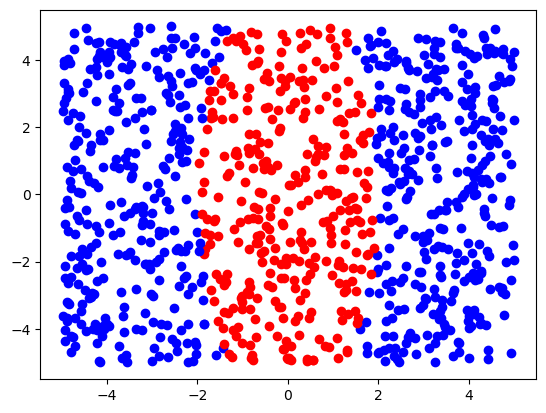

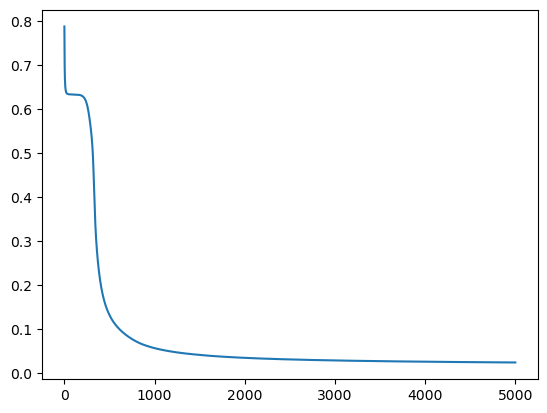

In [139]:
#Q3
num_data=1000 # data points per class

X=np.random.uniform(-5,5,[2,num_data])
y=5*X[0,:]**2+0.5*X[1,:]**2-20>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
#print(X.shape)
#print(y.shape)

# make X and y torch tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).type(torch.LongTensor)

model=nn.Sequential(nn.Linear(2,4),
                    nn.ReLU(),
                    nn.Linear(4,2),
                    nn.ReLU(),
                    nn.Linear(2,2))
# training loop
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-1)


ls = []
for epoch in range(5000):
    a = model(X.T)
    loss = loss_fn(a.float(), y.squeeze()) 
    loss.backward()            # computes the gradient
    optimizer.step()           # update params by -lr * gradient
    optimizer.zero_grad()      # zero out the gradient for next iteration
    ls.append(loss.item())

plt.figure()
plt.plot(ls)

# y_hat = model(X)
y_hat = nn.functional.softmax(model(X.T), dim=1)
pred =  torch.argmax(y_hat, dim=1)
accuracy = torch.sum((pred == y)) / 1000
print('accuracy: ', accuracy.item()*100, '%')

accuracy:  88.7000024318695 %


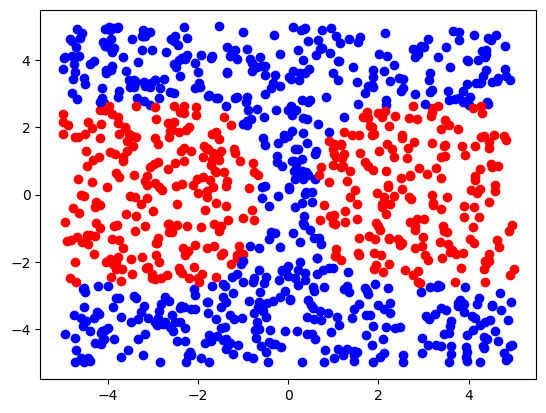

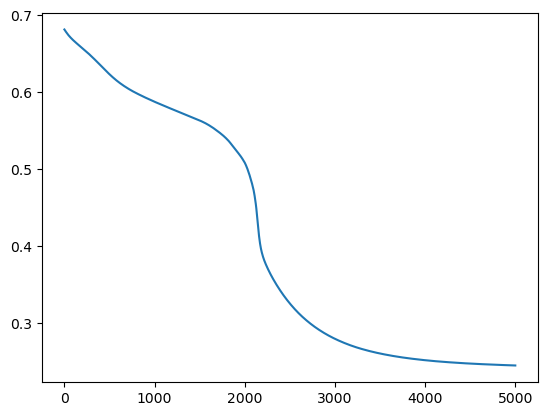

In [140]:
#Q4
num_data=1000 # data points per class

X=np.random.uniform(-5,5,[2,num_data])
y=10*np.exp(-X[0,:]**2)+X[1,:]**2-7>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
#print(X.shape)
#print(y.shape)

# make X and y torch tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).type(torch.LongTensor)

#model = nn.Linear(2, 2) # features, classes
model=nn.Sequential(nn.Linear(2,4),
                    nn.ReLU(),
                    nn.Linear(4,2),
                    nn.ReLU(),
                    nn.Linear(2,2))
# training loop
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)


ls = []
for epoch in range(5000):
    a = model(X.T)
    loss = loss_fn(a.float(), y.squeeze()) 
    loss.backward()            # computes the gradient
    optimizer.step()           # update params by -lr * gradient
    optimizer.zero_grad()      # zero out the gradient for next iteration
    ls.append(loss.item())

plt.figure()
plt.plot(ls)

# y_hat = model(X)
y_hat = nn.functional.softmax(model(X.T), dim=1)
pred =  torch.argmax(y_hat, dim=1)
accuracy = torch.sum((pred == y)) / 1000
print('accuracy: ', accuracy.item()*100, '%')

accuracy:  99.19999837875366 %


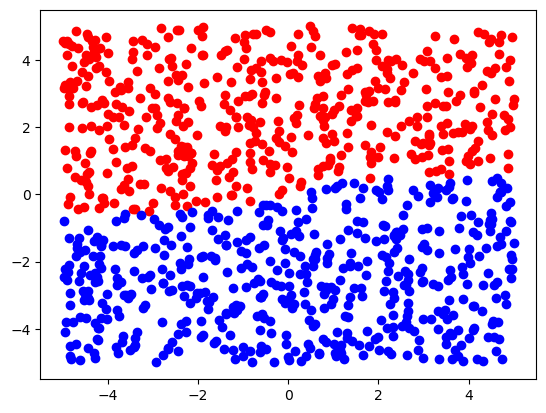

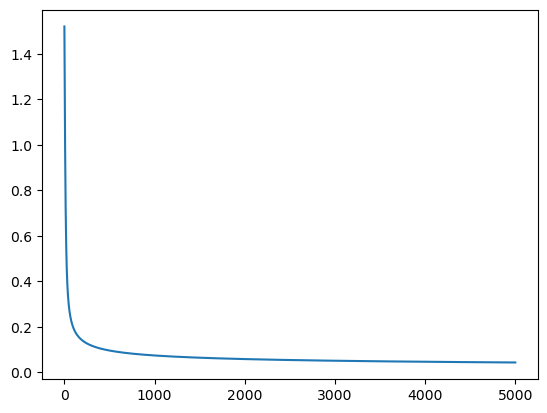

In [131]:
#Q5
num_data=1000 # data points per class

X=np.random.uniform(-5,5,[2,num_data])
y=X[0,:]-20*X[1,:]**3>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
#print(X.shape)
#print(y.shape)

# make X and y torch tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).type(torch.LongTensor)

model = nn.Linear(2, 2) # features, classes
# training loop
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)


ls = []
for epoch in range(5000):
    a = model(X.T)
    loss = loss_fn(a.float(), y.squeeze()) 
    loss.backward()            # computes the gradient
    optimizer.step()           # update params by -lr * gradient
    optimizer.zero_grad()      # zero out the gradient for next iteration
    ls.append(loss.item())

plt.figure()
plt.plot(ls)

# y_hat = model(X)
y_hat = nn.functional.softmax(model(X.T), dim=1)
pred =  torch.argmax(y_hat, dim=1)
accuracy = torch.sum((pred == y)) / 1000
print('accuracy: ', accuracy.item()*100, '%')

(2, 1000)
(1, 1000)
accuracy:  99.59999918937683 %


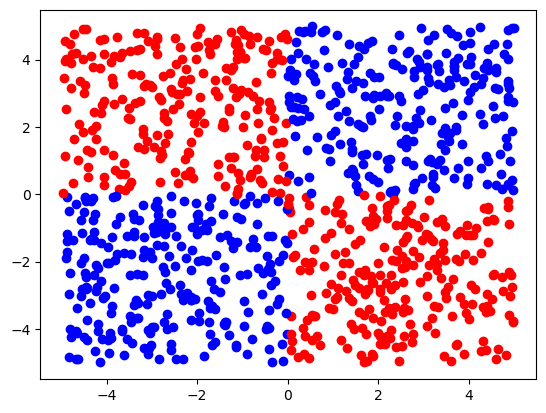

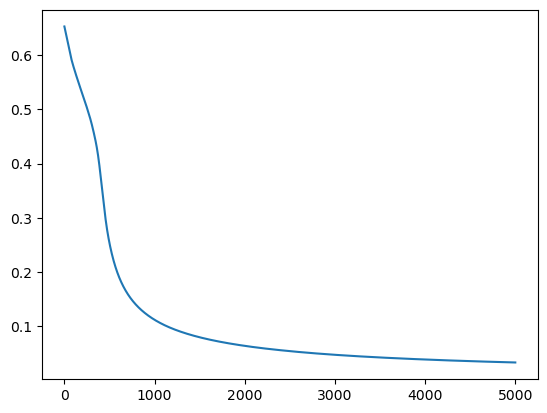

In [156]:
#Q6
num_data=1000 # data points per class

X=np.random.uniform(-5,5,[2,num_data])
y=X[0,:]*X[1,:]>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

# make X and y torch tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).type(torch.LongTensor)

#model = nn.Linear(2, 2) # features, classes
model=nn.Sequential(nn.Linear(2,9),
                    nn.ReLU(),
                    nn.Linear(9,2),
                    nn.ReLU(),
                    nn.Linear(2,2))
# training loop
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)


ls = []
for epoch in range(5000):
    a = model(X.T)
    loss = loss_fn(a.float(), y.squeeze()) 
    loss.backward()            # computes the gradient
    optimizer.step()           # update params by -lr * gradient
    optimizer.zero_grad()      # zero out the gradient for next iteration
    ls.append(loss.item())

plt.figure()
plt.plot(ls)

# y_hat = model(X)
y_hat = nn.functional.softmax(model(X.T), dim=1)
pred =  torch.argmax(y_hat, dim=1)
accuracy = torch.sum((pred == y)) / 1000
print('accuracy: ', accuracy.item()*100, '%')

accuracy:  74.50000047683716 %


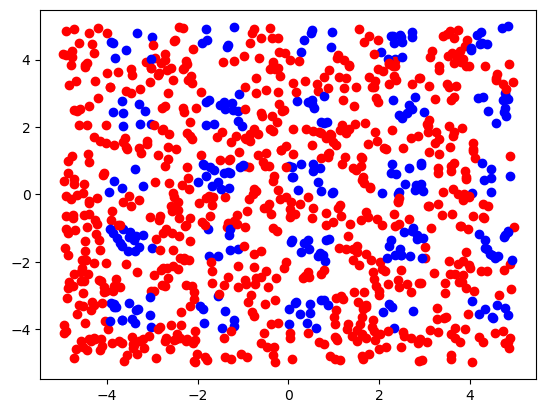

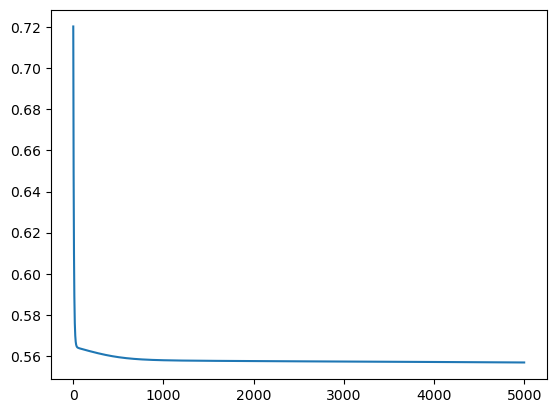

In [160]:
#Q7
num_data=1000 # data points per class

X=np.random.uniform(-5,5,[2,num_data])
y=(np.floor(X[0,:]%2)==0)& (np.floor(X[1,:]%2)==0)>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
#print(X.shape)
#print(y.shape)

# make X and y torch tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).type(torch.LongTensor)

#model = nn.Linear(2, 2) # features, classes
model=nn.Sequential(nn.Linear(2,20),
                    nn.Sigmoid(),
                    nn.Linear(20,2),
                    nn.Sigmoid(),
                    nn.Linear(2,2))
# training loop
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-1)


ls = []
for epoch in range(5000):
    a = model(X.T)
    loss = loss_fn(a.float(), y.squeeze()) 
    loss.backward()            # computes the gradient
    optimizer.step()           # update params by -lr * gradient
    optimizer.zero_grad()      # zero out the gradient for next iteration
    ls.append(loss.item())

plt.figure()
plt.plot(ls)

# y_hat = model(X)
y_hat = nn.functional.softmax(model(X.T), dim=1)
pred =  torch.argmax(y_hat, dim=1)
accuracy = torch.sum((pred == y)) / 1000
print('accuracy: ', accuracy.item()*100, '%')